## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

## Import Libraries

In [258]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [259]:
# to show all the coulmns in output cell
pd.set_option("display.max_columns",100)

## Data Overview

### Read the data set

In [260]:
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Get the details about data

In [261]:
house.shape

(1460, 81)

In [262]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [263]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [264]:
house.drop("Id", axis=1,inplace=True)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Removed Id column as it does not have any significance on model creation**

### Get Categorical and Numerical columns

In [265]:
len(house.select_dtypes("object").columns)

43

In [266]:
len(house.select_dtypes(include=['float64', 'int64']).columns)

37

In [267]:
house_object = house.select_dtypes("object")
house_object.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [268]:
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Column Name : MSSubClass


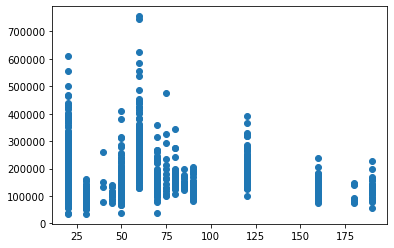

Column Name : LotFrontage


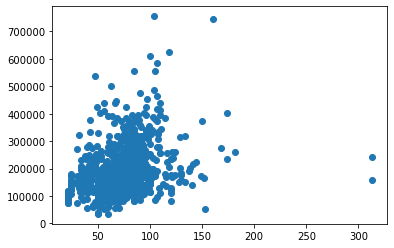

Column Name : LotArea


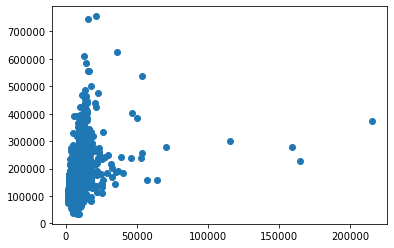

Column Name : OverallQual


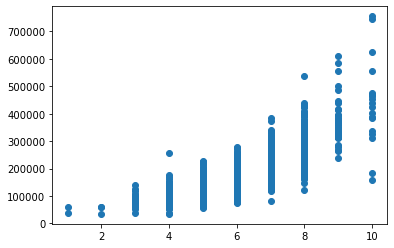

Column Name : OverallCond


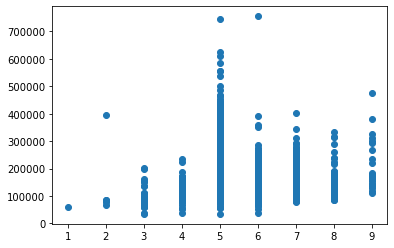

Column Name : YearBuilt


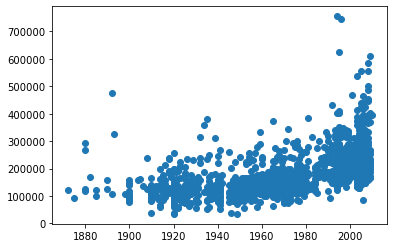

Column Name : YearRemodAdd


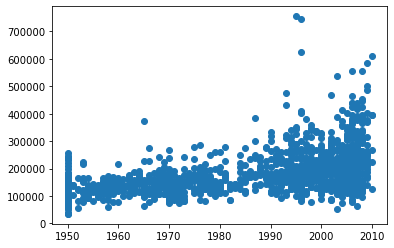

Column Name : MasVnrArea


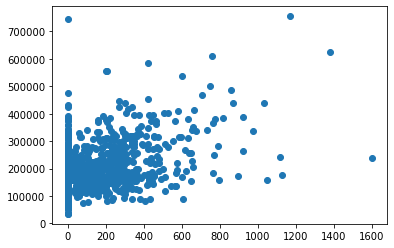

Column Name : BsmtFinSF1


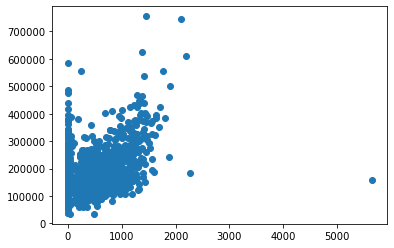

Column Name : BsmtFinSF2


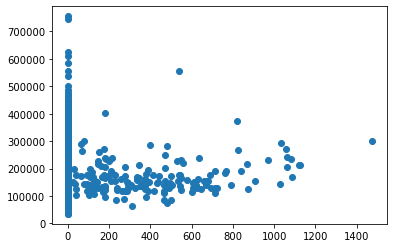

Column Name : BsmtUnfSF


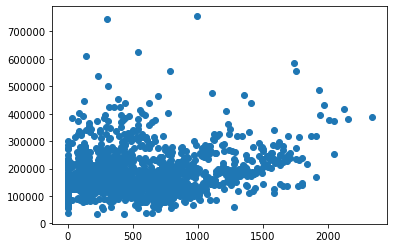

Column Name : TotalBsmtSF


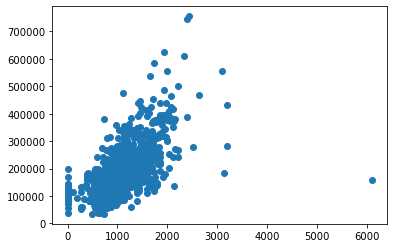

Column Name : 1stFlrSF


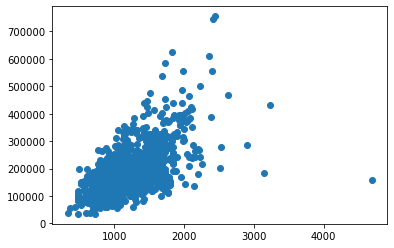

Column Name : 2ndFlrSF


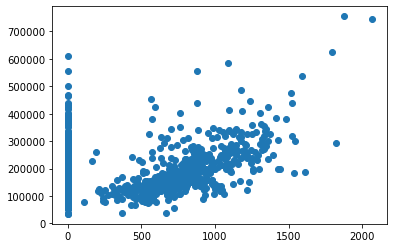

Column Name : LowQualFinSF


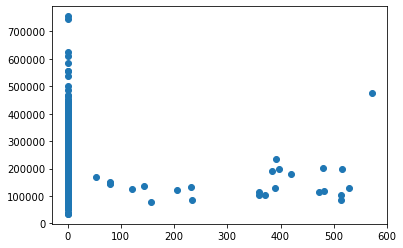

Column Name : GrLivArea


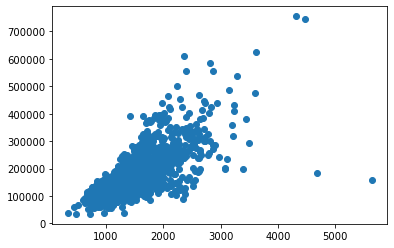

Column Name : BsmtFullBath


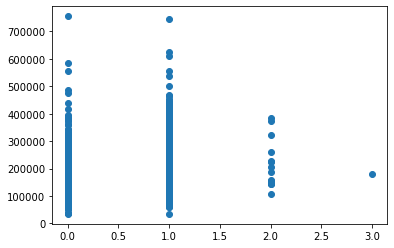

Column Name : BsmtHalfBath


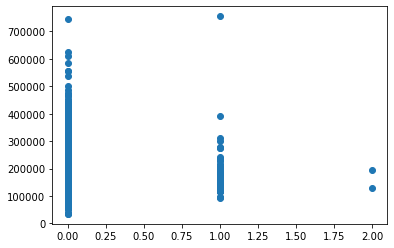

Column Name : FullBath


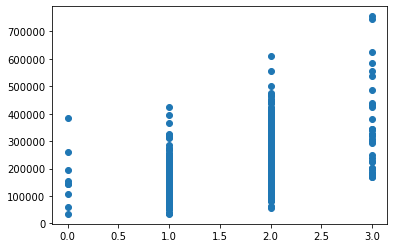

Column Name : HalfBath


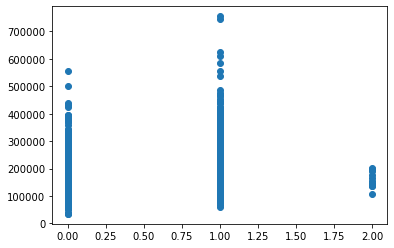

Column Name : BedroomAbvGr


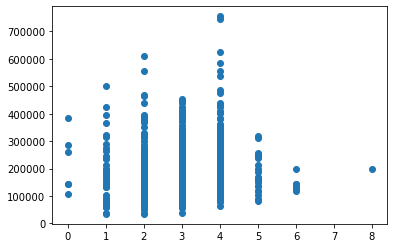

Column Name : KitchenAbvGr


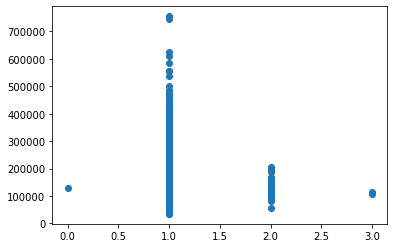

Column Name : TotRmsAbvGrd


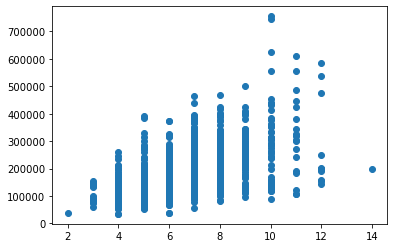

Column Name : Fireplaces


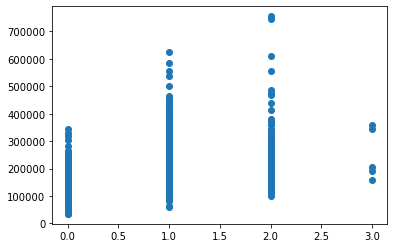

Column Name : GarageYrBlt


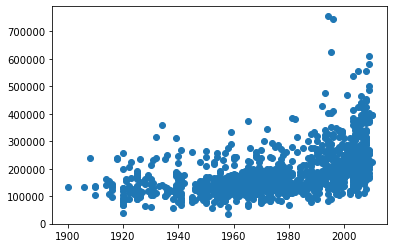

Column Name : GarageCars


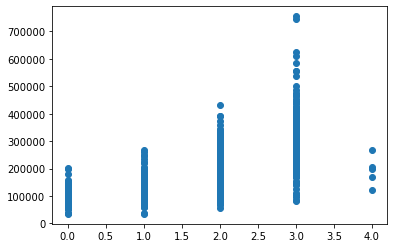

Column Name : GarageArea


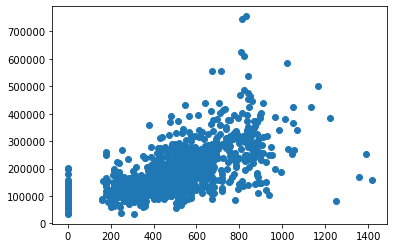

Column Name : WoodDeckSF


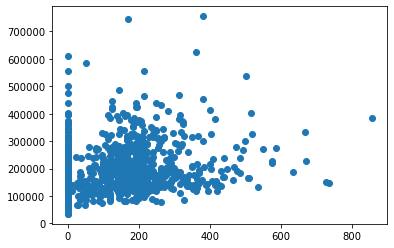

Column Name : OpenPorchSF


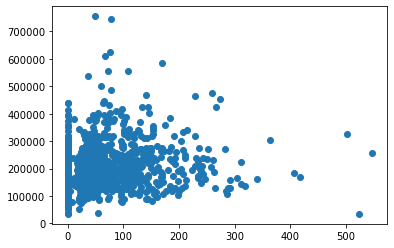

Column Name : EnclosedPorch


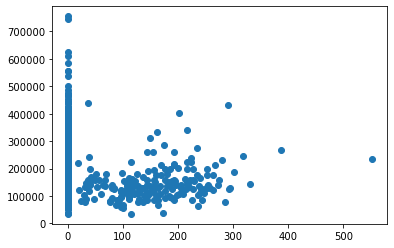

Column Name : 3SsnPorch


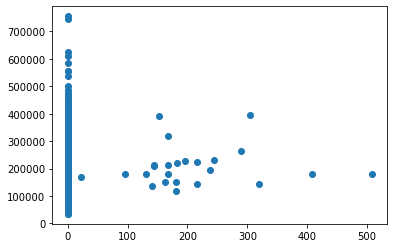

Column Name : ScreenPorch


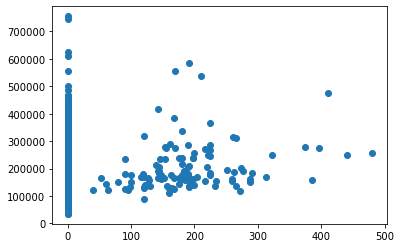

Column Name : PoolArea


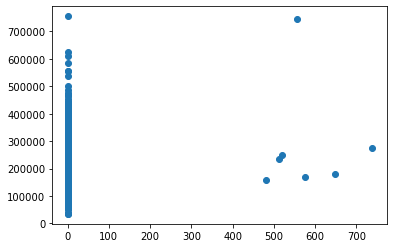

Column Name : MiscVal


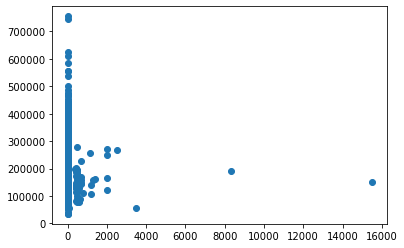

Column Name : MoSold


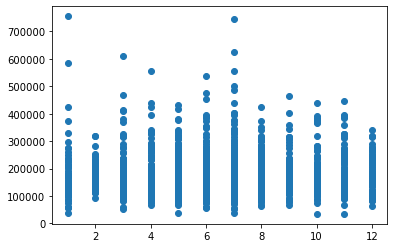

Column Name : YrSold


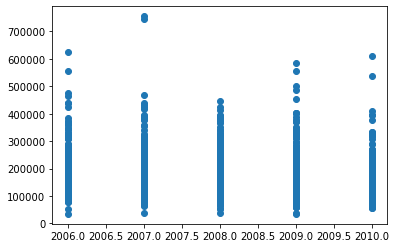

In [269]:
#checking the distribution of numeric variables
cols = house_numeric.columns.drop("SalePrice")
for col in cols:
    print(f'Column Name : {col}')
    #house_numeric[col].value_counts().plot(kind='bar')
    plt.scatter(house_numeric[col], house_numeric["SalePrice"])
    plt.show()

**From numeric columns we can see some the values are  behaving as categorical and some of the values are skewed**

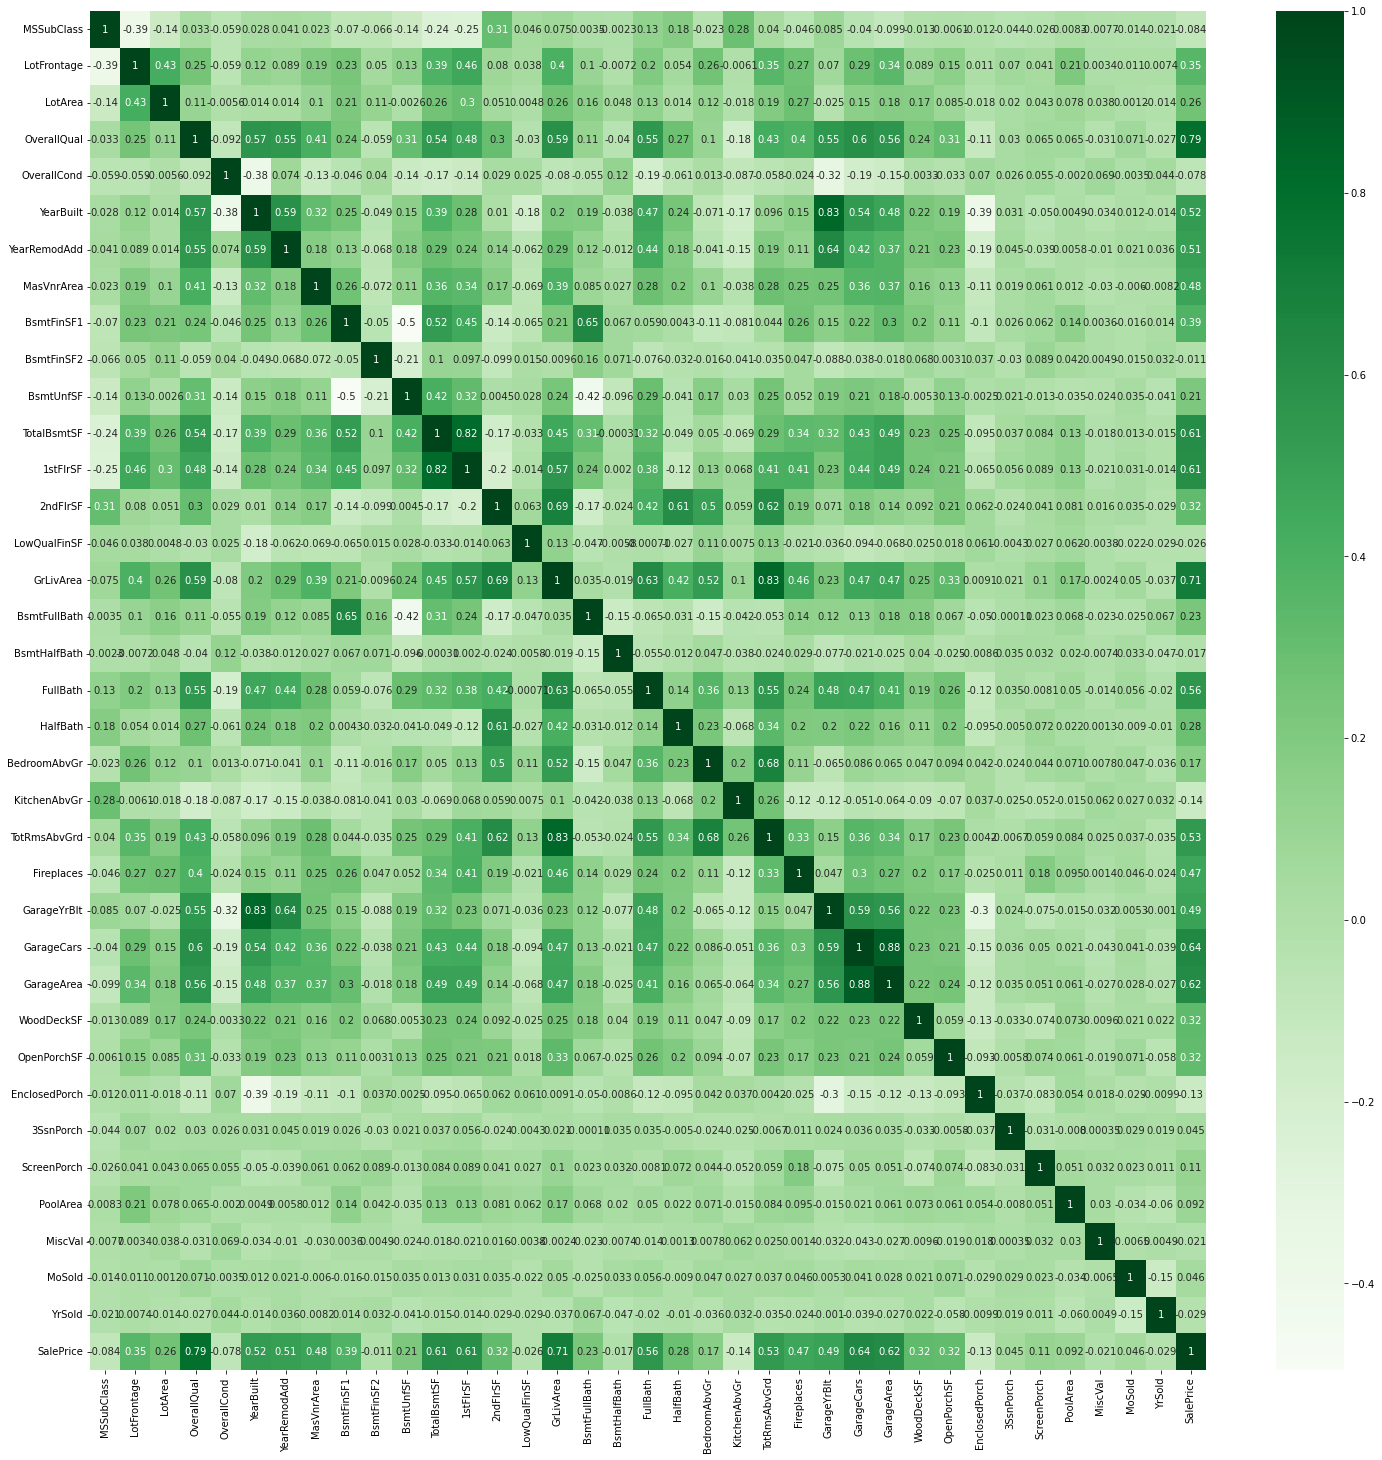

In [270]:
#checking the corelation
plt.figure(figsize=(25,25))
sns.heatmap(house_numeric.corr(), annot=True, cmap='Greens')
plt.show()

**From above heatmap we can conclude there are few highly corelated columns exists in data**

Column Name : MSZoning


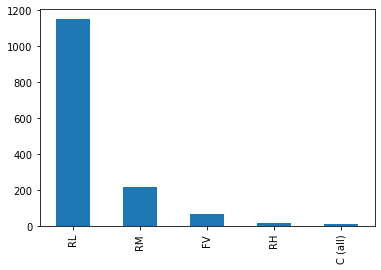

Column Name : Street


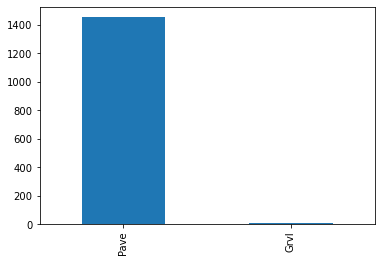

Column Name : Alley


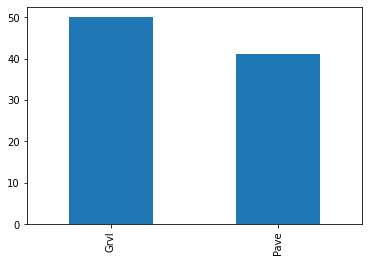

Column Name : LotShape


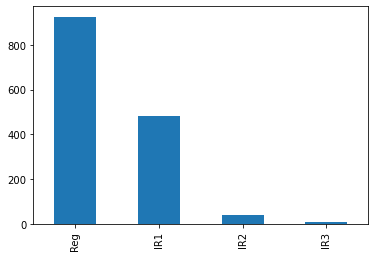

Column Name : LandContour


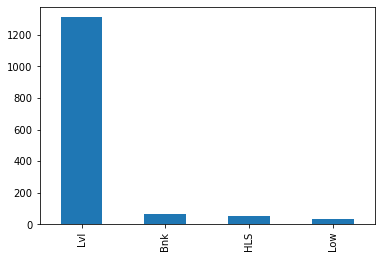

Column Name : Utilities


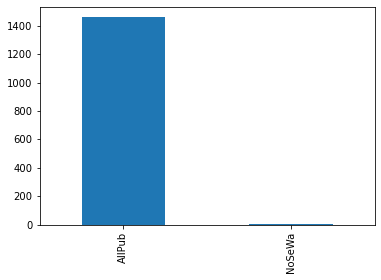

Column Name : LotConfig


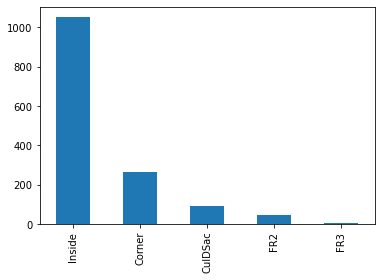

Column Name : LandSlope


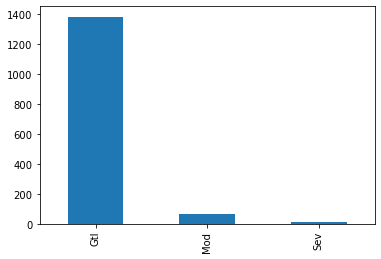

Column Name : Neighborhood


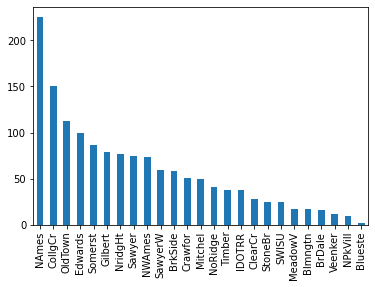

Column Name : Condition1


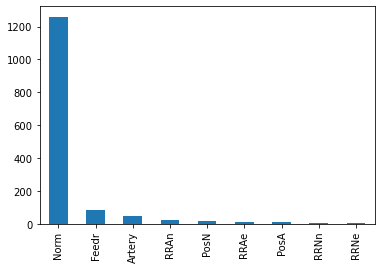

Column Name : Condition2


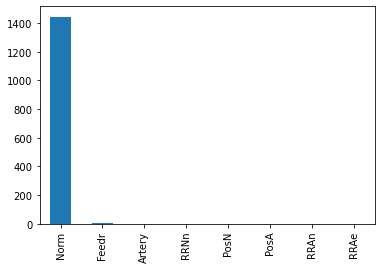

Column Name : BldgType


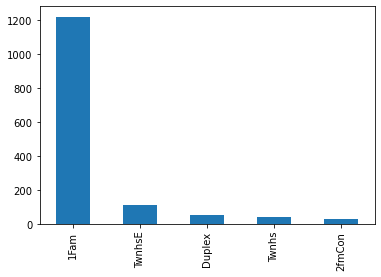

Column Name : HouseStyle


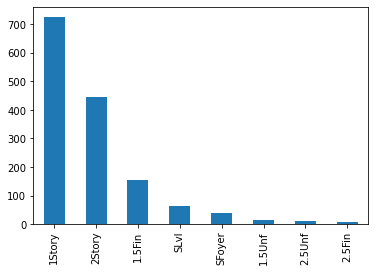

Column Name : RoofStyle


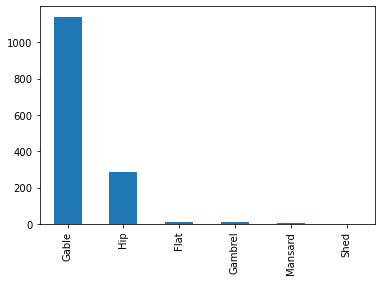

Column Name : RoofMatl


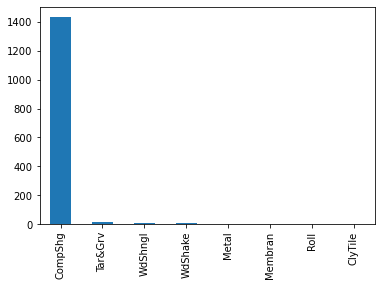

Column Name : Exterior1st


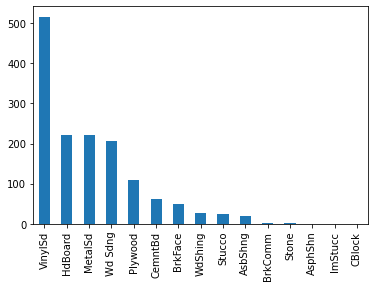

Column Name : Exterior2nd


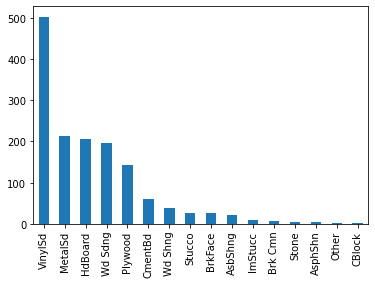

Column Name : MasVnrType


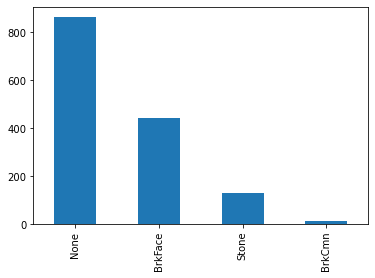

Column Name : ExterQual


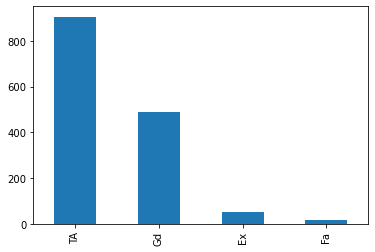

Column Name : ExterCond


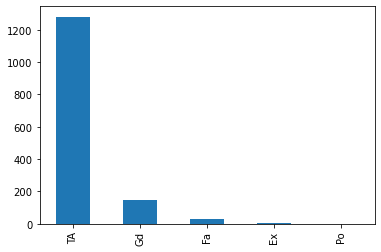

Column Name : Foundation


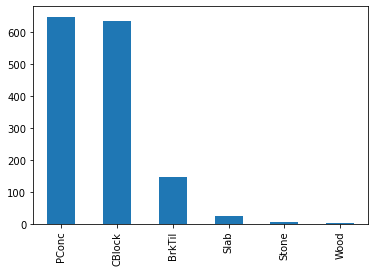

Column Name : BsmtQual


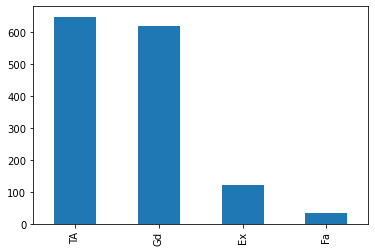

Column Name : BsmtCond


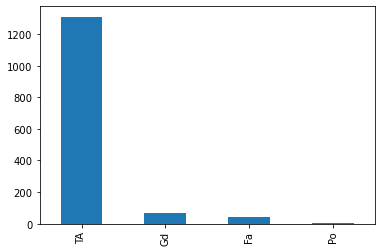

Column Name : BsmtExposure


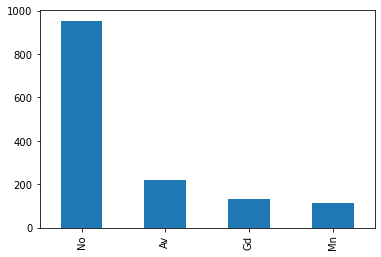

Column Name : BsmtFinType1


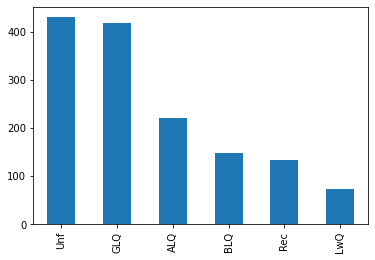

Column Name : BsmtFinType2


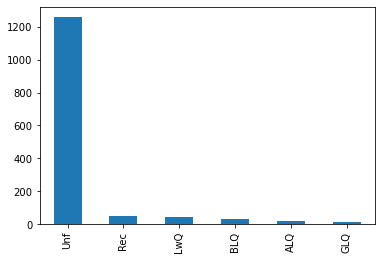

Column Name : Heating


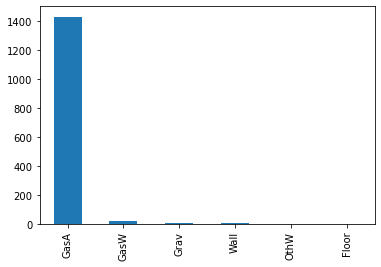

Column Name : HeatingQC


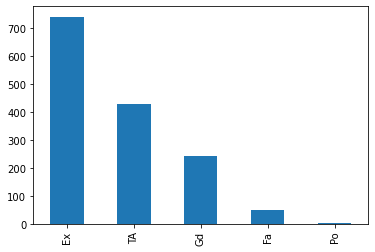

Column Name : CentralAir


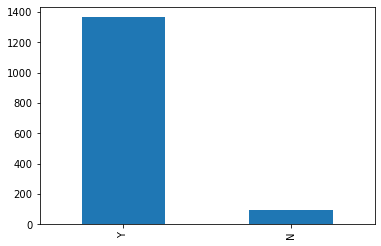

Column Name : Electrical


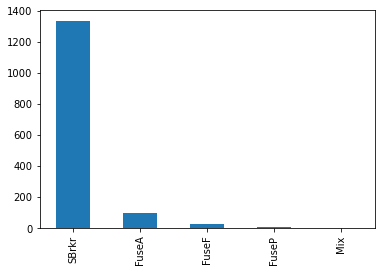

Column Name : KitchenQual


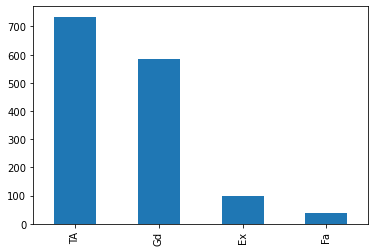

Column Name : Functional


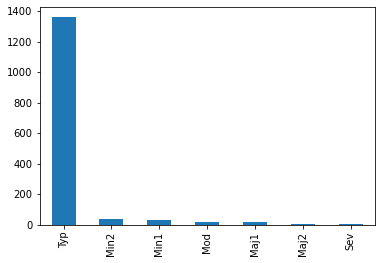

Column Name : FireplaceQu


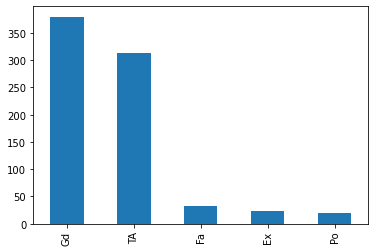

Column Name : GarageType


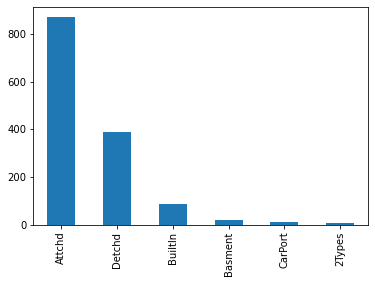

Column Name : GarageFinish


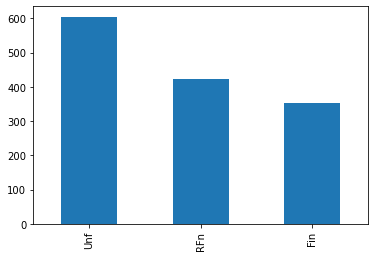

Column Name : GarageQual


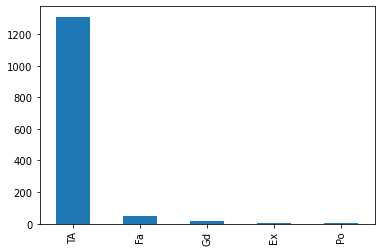

Column Name : GarageCond


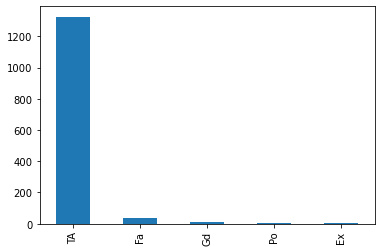

Column Name : PavedDrive


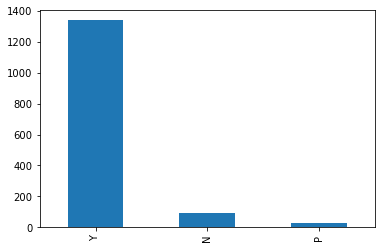

Column Name : PoolQC


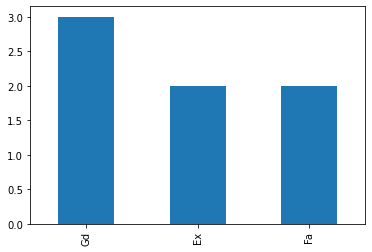

Column Name : Fence


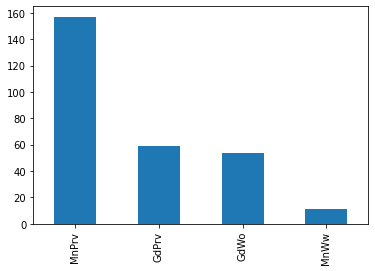

Column Name : MiscFeature


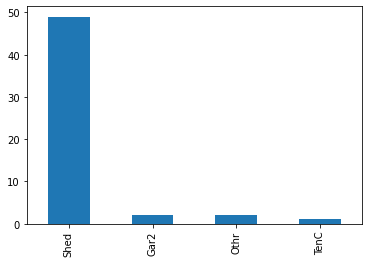

Column Name : SaleType


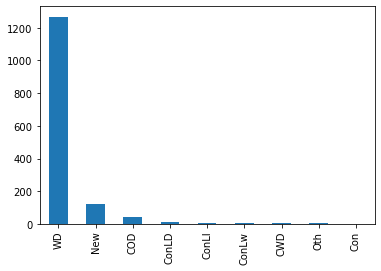

Column Name : SaleCondition


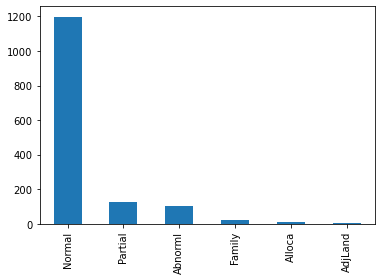

In [271]:
#checking distribution of categorical columns

for col in house_object.columns:
    print(f'Column Name : {col}')
    house_object[col].value_counts().plot(kind='bar')
    plt.show()

**From above plots we can clearly see there are few columns that are highly skewed**

## Data Cleaning

In [272]:
##checking null values of numeric columns

house_numeric.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

**Out of all numeric columns 'LotFrontage' and 'GarageYrBlt' having null values. using data dictionary it is quiet logical to 'LotFrontage' with 0 and there is a high corelation between 'YearBuilt' and 'GarageYrBlt'. Hence dropping that column**

In [273]:
house['LotFrontage'].fillna(0, inplace=True) 

In [274]:
house['MasVnrArea'].fillna(0, inplace=True) 

In [275]:
house.drop('GarageYrBlt', axis=1, inplace=True)

In [276]:
#removing 'YearRemodAdd' as well
house.drop('YearRemodAdd', axis=1, inplace=True)

In [277]:
house.select_dtypes(include=['float64', 'int64']).isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [278]:
##checking null values of categorical columns
house.select_dtypes("object").isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

**these missing values seems like houses  does not have those features. hence just replace it with 'None'**

In [279]:
house.fillna('None', inplace=True)

In [280]:
house.select_dtypes("object").isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

**clearly dataset does not have anymore null values**

In [281]:
# removeing highly skewed columns as those are going to have wrong impact during model creation
# these function returns those column names which having more than 90% of a particular value
def getHighlySkewedCols():
    column = []
    
    for col in house.columns:
        if(house[col].value_counts().max() >= (len(house)*0.9)):
            column.append(col)
    return column

skewedCols = getHighlySkewedCols()
skewedCols

['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal']

In [282]:
house.drop(skewedCols, axis=1,inplace=True)

In [283]:
house.shape

(1460, 57)

In [284]:
### Outlier treatments
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()
                                    

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,0,2,2008,208500
1,20,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,162.0,486,0,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,0,9,2008,223500
3,70,60.0,9550,7,5,1915,0.0,216,0,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,272,2,2006,140000
4,60,84.0,14260,8,5,2000,350.0,655,0,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,0,12,2008,250000


In [285]:
house_numeric.describe(percentiles=[.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,12.000000,2010.000000,442567.010000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


**From above result we can see there is difference between 99% percentile and max values for following columns: 'LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','OpenPorchSF'**

In [286]:
house[['LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','OpenPorchSF']].head()

,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,OpenPorchSF
0,8450,196.0,706,856,61
1,9600,0.0,978,1262,0
2,11250,162.0,486,920,42
3,9550,0.0,216,756,35
4,14260,350.0,655,1145,84


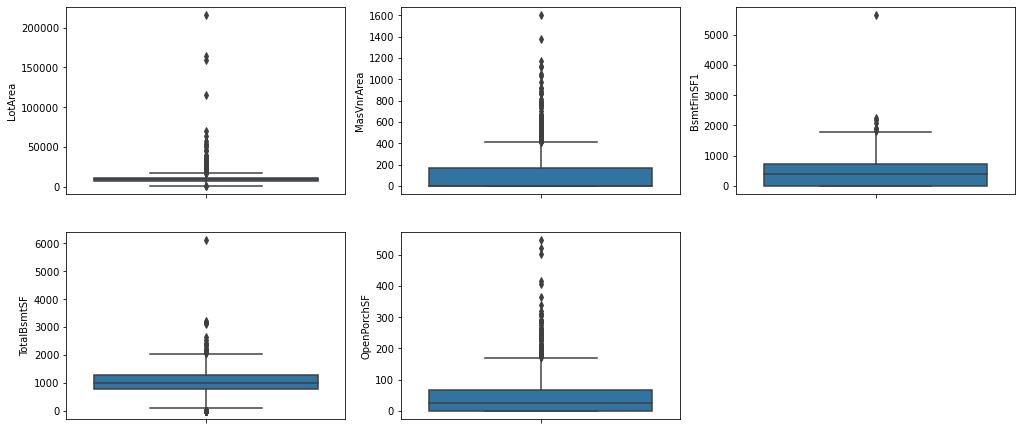

In [287]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
i =1
cols = ['LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','OpenPorchSF']
for col in cols:
    plt.subplot(5,3,i)
    sns.boxplot(y = col, data = house)
    i+=1

plt.show()

In [288]:
house.shape

(1460, 57)

In [289]:
# removing all values beyond 98% percentile

for col in cols:
    outlier_boundary = house[col].quantile(0.98)
    house = house[house[col] < outlier_boundary]

In [290]:
house.shape

(1315, 57)

In [291]:
1344/1460

0.9205479452054794

**92% data remaining after removal of outliers in numerical columns**

In [292]:
from datetime import date

In [293]:
#converting built year to no of years
house['YearBuilt'] = date.today().year - house['YearBuilt']
house['YearBuilt'].head()

0     19
1     46
2     21
3    107
4     22
Name: YearBuilt, dtype: int64

### Handling category columns and dummy creation

In [294]:
cat_cols = house.select_dtypes("object").columns
cat_cols

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [295]:
for col in cat_cols:
    print(f'Coulmn Name : - {col}, Unique Values: - {house[col].unique()}')

Coulmn Name : - MSZoning, Unique Values: - ['RL' 'RM' 'C (all)' 'FV' 'RH']
Coulmn Name : - LotShape, Unique Values: - ['Reg' 'IR1' 'IR2' 'IR3']
Coulmn Name : - LandContour, Unique Values: - ['Lvl' 'Bnk' 'HLS' 'Low']
Coulmn Name : - LotConfig, Unique Values: - ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Coulmn Name : - Neighborhood, Unique Values: - ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'ClearCr' 'NPkVill' 'StoneBr'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Coulmn Name : - Condition1, Unique Values: - ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'RRNe' 'PosA']
Coulmn Name : - BldgType, Unique Values: - ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Coulmn Name : - HouseStyle, Unique Values: - ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Coulmn Name : - RoofStyle, Unique Values: - ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'S

In [296]:
# convert into dummies
dummy_cols= pd.get_dummies(house[cat_cols], drop_first=True)
dummy_cols.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,...,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [297]:
#dropping parent categorical values
house.drop(cat_cols, axis=1,inplace=True)

In [298]:
final_house = pd.concat([house,dummy_cols],axis=1)
final_house.shape

(1315, 199)

In [299]:
final_house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,19,196.0,706,0,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,0,2,2008,208500,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,46,0.0,978,0,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,0,5,2007,181500,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,21,162.0,486,0,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,0,9,2008,223500,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,107,0.0,216,0,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,272,2,2006,140000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,22,350.0,655,0,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,0,12,2008,250000,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


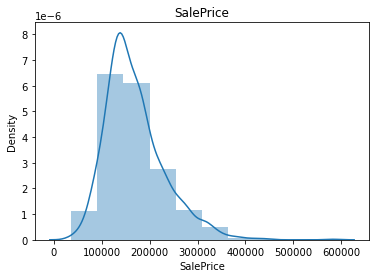

In [300]:
#checking distribution of target variable
plt.title('SalePrice')
sns.distplot(final_house['SalePrice'], bins=10)
plt.show()

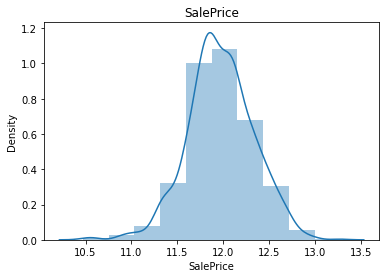

In [301]:
#scaling the the target variable
final_house['SalePrice'] = np.log(final_house['SalePrice'])

plt.title('SalePrice')
sns.distplot(final_house['SalePrice'], bins=10)
plt.show()

## Train Test Split

In [302]:
X = final_house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,19,196.0,706,0,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,0,2,2008,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,46,0.0,978,0,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,0,5,2007,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,21,162.0,486,0,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,0,9,2008,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,107,0.0,216,0,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,272,2,2006,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,22,350.0,655,0,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,0,12,2008,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [303]:
y = final_house['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Scaling the feature variables

In [304]:
from sklearn.preprocessing import scale

In [305]:
# Scaling the features

from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.050392,0.270436,-0.247467,0.808688,-0.535968,-1.091696,0.880427,0.830745,-0.287426,-0.967266,-0.383968,-0.777443,1.206980,0.553251,1.204584,0.875142,1.237810,0.173200,1.025139,-0.903599,0.406052,0.472489,-0.741030,0.417590,-0.372484,-1.602797,0.127861,-0.216736,-0.110983,0.534261,-0.433469,-0.144785,-0.073155,0.726150,-0.174826,-0.13044,0.315434,-0.249393,-0.181640,-0.047818,0.605759,-0.039029,-0.110983,-0.210902,-0.121081,2.829638,-0.188237,-0.282203,-0.251109,-0.167771,...,-0.668315,-0.152795,-0.095966,-0.18164,-0.170151,-0.192526,0.404619,-0.18606,-0.449456,-0.027587,-0.658805,-0.174826,1.226687,-1.050714,-0.150168,-0.56242,0.984156,-0.121081,-0.508304,0.853223,-0.121081,-0.245935,-0.078236,-0.626904,-0.251109,-0.251109,1.554215,-0.884219,-0.190392,-0.095966,-0.251109,-0.047818,0.346558,-0.202908,-0.360174,-0.087538,0.505934,-0.055237,-0.027587,-0.083014,-0.055237,-0.06178,-0.274272,-0.039029,0.36821,-0.055237,-0.091845,-0.114442,0.447010,-0.27905
1,-0.891215,0.734494,0.073884,0.028479,2.147273,-0.197233,-0.608616,1.545508,-0.287426,-0.649403,0.759138,0.491854,-0.815927,-0.418300,-0.780413,0.875142,-0.749638,0.173200,-0.258114,0.717455,0.406052,0.035961,1.796079,-0.754987,-0.372484,-0.484665,-0.626116,-0.216736,-0.110983,0.534261,-0.433469,-0.144785,-0.073155,0.726150,-0.174826,-0.13044,0.315434,-0.249393,5.505409,-0.047818,-1.650822,-0.039029,-0.110983,-0.210902,-0.121081,-0.353402,-0.188237,-0.282203,-0.251109,-0.167771,...,-0.668315,-0.152795,-0.095966,-0.18164,-0.170151,-0.192526,0.404619,-0.18606,-0.449456,-0.027587,-0.658805,-0.174826,-0.815204,0.951734,-0.150168,-0.56242,-1.016099,-0.121081,1.967326,0.853223,-0.121081,-0.245935,-0.078236,-0.626904,-0.251109,-0.251109,1.554215,-0.884219,-0.190392,-0.095966,-0.251109,-0.047818,0.346558,-0.202908,-0.360174,-0.087538,0.505934,-0.055237,-0.027587,-0.083014,-0.055237,-0.06178,-0.274272,-0.039029,0.36821,-0.055237,-0.091845,-0.114442,0.447010,-0.27905
2,0.050392,0.363247,0.534954,0.808688,-0.535968,-1.025439,0.622124,0.252629,-0.287426,-0.293587,-0.203774,-0.577357,1.235405,0.718068,1.204584,0.875142,1.237810,0.173200,-0.258114,0.717455,0.406052,0.770122,-0.741030,0.052361,-0.372484,1.006177,0.127861,-0.216736,-0.110983,0.534261,-0.433469,-0.144785,-0.073155,-1.377126,-0.174826,-0.13044,0.315434,-0.249393,-0.181640,-0.047818,0.605759,-0.039029,-0.110983,-0.210902,-0.121081,2.829638,-0.188237,-0.282203,-0.251109,-0.167771,...,-0.668315,-0.152795,-0.095966,-0.18164,-0.170151,-0.192526,0.404619,-0.18606,-0.449456,-0.027587,-0.658805,-

In [306]:
# Split into test and train data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=42)

In [307]:
X_train.shape, X_test.shape

((920, 198), (395, 198))

## Recursive feature elimination (RFE)
**Since there are 198 features, we will use RFE to get top 50 features**

In [308]:
def top_n_cols(n):
    top_n_cols = []
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    rfe = RFE(lm, n)
    rfe = rfe.fit(X_train, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [309]:
top_40 = top_n_cols(40)
top_50 = top_n_cols(50)
top_60 = top_n_cols(60)
top_70 = top_n_cols(70)

Top 40 features : 
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'Condition1_Norm', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_BrkFace', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Foundation_PConc', 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'SaleType_ConLD', 'SaleType_New', 'SaleCondition_Alloca', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL'

In [310]:
#get the statistics details
import statsmodels.api as sm
def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary()) 

In [311]:
build_regressor(X_train,y_train,top_40)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     259.8
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:29:09   Log-Likelihood:                 829.85
No. Observations:                 920   AIC:                            -1578.
Df Residuals:                     879   BIC:                            -1380.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.97

In [312]:
build_regressor(X_train,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     220.2
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:29:09   Log-Likelihood:                 840.97
No. Observations:                 920   AIC:                            -1584.
Df Residuals:                     871   BIC:                            -1348.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.97

In [313]:
build_regressor(X_train,y_train,top_60)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     212.5
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:29:09   Log-Likelihood:                 844.20
No. Observations:                 920   AIC:                            -1586.
Df Residuals:                     869   BIC:                            -1340.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -0.02

In [314]:
build_regressor(X_train,y_train,top_70)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     180.1
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:29:09   Log-Likelihood:                 856.43
No. Observations:                 920   AIC:                            -1591.
Df Residuals:                     859   BIC:                            -1297.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -0.01

**Checking with 40,50,60,70 features out of 198, we can see for 50 features Adj R Square is 0.92. So we can go 50 with 50 tope features**

In [315]:
#basic linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [316]:
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [317]:
rfe_col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df


,Features,rfe_support,rfe_ranking
0,MSSubClass,True,1
2,LotArea,True,1
3,OverallQual,True,1
4,OverallCond,True,1
5,YearBuilt,True,1
7,BsmtFinSF1,True,1
8,BsmtFinSF2,True,1
9,BsmtUnfSF,True,1
10,TotalBsmtSF,True,1
13,GrLivArea,True,1


In [318]:
# Assign the 50 columns to X_train_rfe
X_train = X_train[rfe_col]
X_train.shape

(920, 50)

In [319]:
X_test = X_test[rfe_col]
X_test.shape

(395, 50)

## Model Building and Evaluation

In [320]:
def build_model(X_train, y_train, X_test, params, model='ridge'):
    if model == 'ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
    model_cv.fit(X_train, y_train)
    alpha = model_cv.best_params_["alpha"]
    print("Optimum alpha for %s is %f" %(model, alpha))
    final_model = model_cv.best_estimator_

    final_model.fit(X_train, y_train)
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)

    # Model Evaluation
    print(model," Regression with ",alpha)
    print("===================================")
    print('R2 score (train) : ',r2_score(y_train,y_train_pred))
    print('R2 score (test) : ',r2_score(y_test,y_test_pred))
    print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

    return final_model, y_test_pred

####  Ridge Regression

In [321]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000 ]}

ridge_final_model, y_test_predicted = build_model(X_train, y_train, X_test, params, model='ridge')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for ridge is 10.000000
ridge  Regression with  10
R2 score (train) :  0.9233400430133688
R2 score (test) :  0.8840014227627366
RMSE (train) :  0.09733369673613504
RMSE (test) :  0.12826587251122434


**Ridge Regression model was able to achieve R2 score of 0.88 on test data i.e. 88% of the variance in test data can be explained by the model.
Root Mean Square Error = 0.12 on test data, that means the prediction made by the model can off by 0.12 unit.**

#### Lasso Regression

In [322]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train, y_train, X_test, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.000100
lasso  Regression with  0.0001
R2 score (train) :  0.9238227550067751
R2 score (test) :  0.8855250382327908
RMSE (train) :  0.09702676766401612
RMSE (test) :  0.12742071627283433


**Lasso Regression model was able to achieve R2 score of 0.88 on test data i.e. 88% of the variance in test data can be explained by the model. Root Mean Square Error = 0.12 on test data, that means the prediction made by the model can off by 0.12 unit.**

#### Compare Ridge and Lasso model coefficient

In [323]:
model_coefficients = pd.DataFrame(index=X_test.columns)
model_coefficients.rows = X_test.columns

model_coefficients['Ridge (alpha=10.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=10.0),Lasso (alpha=0.0001)
MSSubClass,-0.018780,-1.912490e-02
LotArea,0.023326,2.279710e-02
OverallQual,0.066907,6.505986e-02
OverallCond,0.061741,6.238782e-02
YearBuilt,-0.072402,-7.581139e-02
BsmtFinSF1,0.034946,3.085753e-02
BsmtFinSF2,0.009141,7.604922e-03
BsmtUnfSF,0.004506,-0.000000e+00
TotalBsmtSF,0.046797,5.006324e-02
GrLivArea,0.108259,1.129730e-01


In [324]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[ 88305 267396 206900 208317 137367]


## Final Model

**as Lasso provides slightly better R2 score, hence we are considering Lasso as our final model**

**Q: Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house **

In [325]:
# 50 features ordered by feature importance in Lasso Regression as following:

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Lasso (alpha=0.0001)
GrLivArea,1.129730e-01
MSZoning_RL,9.095161e-02
OverallQual,6.505986e-02
OverallCond,6.238782e-02
MSZoning_RM,6.025738e-02
MSZoning_FV,5.963188e-02
TotalBsmtSF,5.006324e-02
SaleCondition_Partial,3.439863e-02
BsmtFinSF1,3.085753e-02
MSZoning_RH,2.485554e-02


In [326]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['GrLivArea', 'MSZoning_RL', 'OverallQual', 'OverallCond', 'MSZoning_RM',
       'MSZoning_FV', 'TotalBsmtSF', 'SaleCondition_Partial', 'BsmtFinSF1',
       'MSZoning_RH'],
      dtype='object')

**Top 10 Features are : 'GrLivArea', 'MSZoning_RL', 'OverallQual', 'OverallCond', 'MSZoning_RM','MSZoning_FV', 'TotalBsmtSF', 'SaleCondition_Partial', 'BsmtFinSF1','MSZoning_RH'**

## Assignment Questions

**Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

**using above analysis we have found optimal value for Ridge is 10.0 and optimal value of lasso is 0.0001**

In [327]:
# Model Building when ridge alpha is 10.0*2 = 20.0
ridge_model = Ridge(alpha=20.0)
ridge_model.fit(X_train, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

print("Model Evaluation : Ridge Regression, alpha=20.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=20.0
R2 score (train) :  0.9226
R2 score (test) :  0.8833
RMSE (train) :  0.0978
RMSE (test) :  0.1286


In [328]:
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9237
R2 score (test) :  0.8859
RMSE (train) :  0.0971
RMSE (test) :  0.1272


In [329]:
model_coefficients['Ridge (alpha = 20.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.0002)'] = lasso_model.coef_
model_coefficients

,Ridge (alpha=10.0),Lasso (alpha=0.0001),Ridge (alpha = 20.0),Lasso (alpha = 0.0002)
MSSubClass,-0.018780,-1.912490e-02,-0.018189,-0.018777
LotArea,0.023326,2.279710e-02,0.023854,0.022933
OverallQual,0.066907,6.505986e-02,0.068131,0.065935
OverallCond,0.061741,6.238782e-02,0.060860,0.062493
YearBuilt,-0.072402,-7.581139e-02,-0.069042,-0.075921
BsmtFinSF1,0.034946,3.085753e-02,0.034838,0.030915
BsmtFinSF2,0.009141,7.604922e-03,0.009505,0.008352
BsmtUnfSF,0.004506,-0.000000e+00,0.004562,-0.000000
TotalBsmtSF,0.046797,5.006324e-02,0.046909,0.049816
GrLivArea,0.108259,1.129730e-01,0.104350,0.113144


**Question 2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?**

**Ans: We will choose lasso as the R2 score is little better and lasso is a feature elimination model.**


**Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

 

In [330]:
# Top 5 featues in Lasso final model

top5 = model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)
top5

,Ridge (alpha=10.0),Lasso (alpha=0.0001),Ridge (alpha = 20.0),Lasso (alpha = 0.0002)
GrLivArea,0.108259,0.112973,0.104350,0.113144
MSZoning_RL,0.063975,0.090952,0.048926,0.083766
OverallQual,0.066907,0.065060,0.068131,0.065935
OverallCond,0.061741,0.062388,0.060860,0.062493
MSZoning_RM,0.036329,0.060257,0.022727,0.053980


In [331]:
cols = list(top5.index)
cols

['GrLivArea', 'MSZoning_RL', 'OverallQual', 'OverallCond', 'MSZoning_RM']

In [332]:
X_train_new = X_train.drop(cols, axis=1)
X_test_new = X_test.drop(cols, axis=1)

In [333]:
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [334]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
top5_new = model_coeff.sort_values(by='Lasso', ascending=False).head(5)
top5_new

,Lasso
TotalBsmtSF,0.103012
FullBath,0.069057
SaleCondition_Partial,0.050020
HalfBath,0.046504
Neighborhood_Crawfor,0.039449


In [335]:
list(top5_new.index)

['TotalBsmtSF',
 'FullBath',
 'SaleCondition_Partial',
 'HalfBath',
 'Neighborhood_Crawfor']